### Tutorial 6 - Cameron O'Dell

### Activity-I

**In the Tutorial Completion Document, describe your findings.**

a. Fit/train the model with all the features of the data, including **`SkinThickness`** which is not included in the above demo.

In [99]:
# imports
import pandas as pd
import seaborn as sns

# dataset
diabetes = pd.read_csv(fpath+"diabetes.csv")
diabetes.head()

# split dataset in features and target variable
X = diabetes.drop('Outcome', axis=1) # Features
y = diabetes.Outcome # Target variable

# split X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# instantiate model
logreg = LogisticRegression(random_state=16)

# fit
logreg.fit(X_train, y_train)

# predict
y_pred = logreg.predict(X_test)
y_pred_prob_all = logreg.predict_proba(X)
y_pred_all = logreg.predict(X)

C:\Users\14175\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**In the Tutorial Completion Document, describe your findings.**

b. Evaluate the above model. Then compare and discuss your findings with the demo model's results. List your observations. Plot the confusion matrix (Accuracy, Precesion, Recall and F1 Score) and ROC curve.

In [66]:
# Use the model from previous step (Activity I.a)

# To-do: Evaluate the above model.
# Then compare and discuss your findings with the demo model's results.
# List your observations. Plot the confusion matrix (Accuracy, Precesion, Recall and F1 Score) and ROC curve.

# confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

names = ['No(0)', 'Yes(1)']

fig = ff.create_annotated_heatmap(cnf_matrix, x=names, y=names, colorscale=px.colors.sequential.Viridis)

fig.update_layout(title='Diabetes Dataset Confusion Matrix',
                  autosize=False,
                  width=700,
                  height=500,
                  margin=dict(
                      t=150,
                      l=0,
                      r=0,
                      b=0,
                  ),
                  xaxis_title='Predicted Value',
                  yaxis_categoryorder='category descending',
                  yaxis_title='Actual Value')
fig.show()

# crosstab
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

# classification report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

# ROC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate')
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_layout(
    autosize=False,
    width=700,
    height=500,
    margin=dict(
        t=150,
        l=0,
        r=0,
        b=0,
    ))

fig.show()

[[116   9]
 [ 26  41]]


                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



<AxesSubplot:>

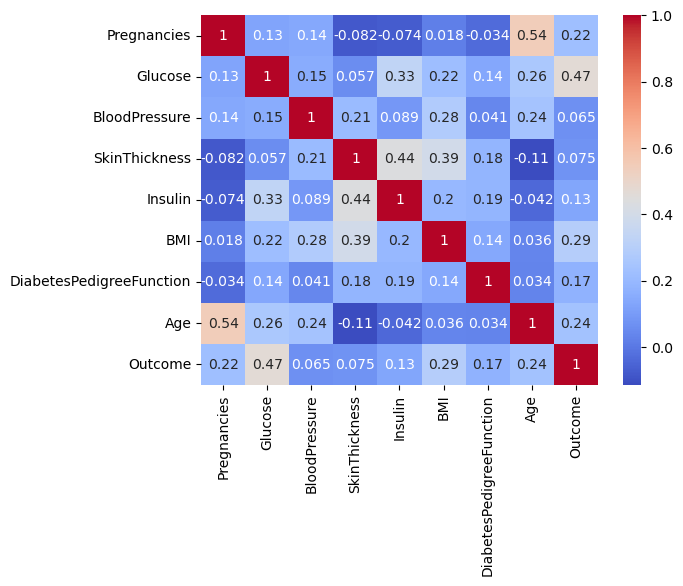

In [67]:
# correlation Matrix to test multicollinearity
# compute correlation matrix
corr_matrix = diabetes.corr()

# plot correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

## Activity I a& b findings

The measures of accuracy did not change substantially from the previous data set to the dataset including skin thickness.
Precision increased by 0.01. Recall, f1-score, and support remained the same. AUC declined by about 0.01. Overall the model accuracy did not change is a significant way. This means there are three possibilities: 

1. Skin thickness has a low level of correlation to diabetes outcome
2. Skin thickness is correlated with other variables (multicollinear)
3. A combination of the previous two points

In order to test this further, I created a correlation matrix to see the degree of correlation between differing variables in the dataset.

Skin thickness has a correlation coefficient of 0.075 with diabetes outcome, which is not significant. Skin thickness also has a substantial positive correlation to insulin levels(0.44) and BMI(0.39). Given these results, it is possible that skin thickness is increased by rising insulin levels and BMI, but that skin thickness itself is not a good predictor of diabetes outcome in patients.

I think a logical explanation for this could be that while skin thickness increases with diabetes, total thickness is related more to genetic disposition/inheritance. This is purely speculation though since I don’t have data available to test this.


## TASK I

For TASK I, we will use the new disease data set (Heart Attack Prediction Dataset)

**Heart Attack Prediction Dataset:**

You can download data from the following link: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset


**Context:**

This dataset contains information related to patients who have had heart attacks.

**Content:**

The datasets consists of several medical predictor variables and one target variable. Predictor variables includes the Age, Sex, cholestoral and resting blood pressure so on.

**In the Tutorial Completion Document, describe your findings.**

a. Fit/train the model with **`age, cp, trtbps, chol, thalachh`**

In [75]:
#imports
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score

# dataset
heart_attack = pd.read_csv(fpath+"heart.csv")
heart_attack.head()

# define features
selected_cols = ['age', 'cp', 'trtbps', 'chol', 'thalachh']
X = heart_attack[selected_cols]

# define target variable
y = heart_attack['output']

# split X and y 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# instantiate model
logreg = LogisticRegression(random_state=16)

# fit
logreg.fit(X_train, y_train)

# predict 
y_pred = logreg.predict(X_test)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# ROC
roc_score = roc_auc_score(y_test, y_pred)
print(roc_score)

[[29 12]
 [10 25]]
0.710801393728223


**In the Tutorial Completion Document, describe your findings.**

b. Evaluate the above model. List your observations. Plot the confusion matrix (Accuracy, Precesion, Recall and F1 Score) and ROC curve.

In [76]:
# Use the model from previous step (TASK I.a)

# To-do: Evaluate the above model.
# List your observations. Plot the confusion matrix (Accuracy, Precesion, Recall and F1 Score) and ROC curve.
fig = ff.create_annotated_heatmap(cnf_matrix, x=names, y=names, colorscale=px.colors.sequential.Viridis)

fig.update_layout(title='Heart Attack Dataset Confusion Matrix',
                  autosize=False,
                  width=700,
                  height=500,
                  margin=dict(
                      t=150,
                      l=0,
                      r=0,
                      b=0,
                  ),
                  xaxis_title='Predicted Value',
                  yaxis_categoryorder='category descending',
                  yaxis_title='Actual Value')
fig.show()

# crosstab
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

# classification report
target_names = ['without heart attack', 'with heart attack']
print(classification_report(y_test, y_pred, target_names=target_names))

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate')
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_layout(
    autosize=False,
    width=700,
    height=500,
    margin=dict(
        t=150,
        l=0,
        r=0,
        b=0,
    ))

fig.show()

                      precision    recall  f1-score   support

without heart attack       0.74      0.71      0.72        41
   with heart attack       0.68      0.71      0.69        35

            accuracy                           0.71        76
           macro avg       0.71      0.71      0.71        76
        weighted avg       0.71      0.71      0.71        76



<AxesSubplot:>

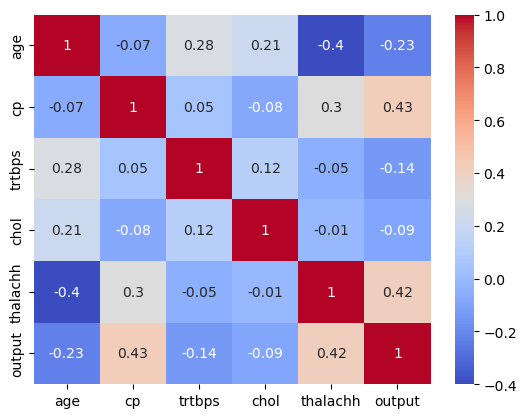

In [95]:
# Correlation matrix heart attack dataset, searching for multicollinearity
cols_of_interest = ['age', 'cp', 'trtbps', 'chol', 'thalachh','output']
heart_attack_subset = heart_attack[cols_of_interest]

corr_matrix = heart_attack_subset.corr().round(2)
# Plot the correlation matrix using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 

## Task 1 a & b Findings

With a precision of 0.68 in predicting "more chance of heart attack", the model likely could be improved by including other types of data for variables or improving the quality of the data. Worth noting, the source for the data on the Kaggle site doesn't actually say if the patients have had heart attacks or not. The key lists output '1' as "more likely" and '0' as "less likely". If this is the case, I think that's a potential concern with the quality of the data. It becomes less clear what the dataset is  predicting if the logistic regression is comparing percentages instead of concrete binary outcome.

The precision for predicting "less chance of heart attack" is higher at 0.74. Since the false positive rate is lower, there probably isn't any harm in running the model as a supplementary test alongside other tests.

When checking the data for multicollinearity, I noticed chest pains(cp) and maximum heart rate(thalachh) had the highest correlation with target output. There exists some degree of multicollinearity, especially with chest pains and age to the other variables.


**In the Tutorial Completion Document, describe your findings.**

c. Fit/train the model with **`age, cp, trtbps, chol, thalachh and sex`**

In [96]:
#imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score

# dataset
heart_attack = pd.read_csv(fpath+"heart.csv")
heart_attack.head()

# define features
selected_cols = ['age', 'cp', 'trtbps', 'chol', 'thalachh', 'sex']
X = heart_attack[selected_cols]

# define target variables
y = heart_attack['output']

# split X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# instantiate model
logreg = LogisticRegression(random_state=16)

# fit
logreg.fit(X_train, y_train)

# predict
y_pred = logreg.predict(X_test)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# ROC
roc_score = roc_auc_score(y_test, y_pred)
print(roc_score)

[[25 16]
 [ 8 27]]
0.6905923344947735


**In the Tutorial Completion Document, describe your findings.**

d. Evaluate the above model (TASK I.c). Then compare and discuss your findings with the model from TASK I.a. List your observations. Plot the confusion matrix (Accuracy, Precesion, Recall and F1 Score) and ROC curve.

In [97]:
# Use the model from previous step (TASK I.c)

# To-do: Evaluate the above model.
# Then compare and discuss your findings with the model from TASK I.a.
# List your observations. Plot the confusion matrix (Accuracy, Precesion, Recall and F1 Score) and ROC curve.

fig = ff.create_annotated_heatmap(cnf_matrix, x=names, y=names, colorscale=px.colors.sequential.Viridis)

fig.update_layout(title='Heart Attack Dataset Confusion Matrix',
                  autosize=False,
                  width=700,
                  height=500,
                  margin=dict(
                      t=150,
                      l=0,
                      r=0,
                      b=0,
                  ),
                  xaxis_title='Predicted Value',
                  yaxis_categoryorder='category descending',
                  yaxis_title='Actual Value')
fig.show()

# crosstab
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

# classification report
target_names = ['without heart attack', 'with heart attack']
print(classification_report(y_test, y_pred, target_names=target_names))

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate')
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_layout(
    autosize=False,
    width=700,
    height=500,
    margin=dict(
        t=150,
        l=0,
        r=0,
        b=0,
    ))

fig.show()

                      precision    recall  f1-score   support

without heart attack       0.76      0.61      0.68        41
   with heart attack       0.63      0.77      0.69        35

            accuracy                           0.68        76
           macro avg       0.69      0.69      0.68        76
        weighted avg       0.70      0.68      0.68        76



<AxesSubplot:>

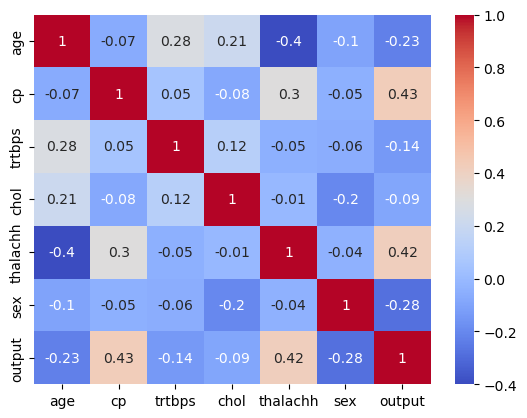

In [98]:
# Correlation matrix heart attack dataset, searching for multicollinearity
cols_of_interest = ['age', 'cp', 'trtbps', 'chol', 'thalachh','sex','output']
heart_attack_subset = heart_attack[cols_of_interest]

corr_matrix = heart_attack_subset.corr().round(2)
# Plot the correlation matrix using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 

## Task 1 c & d Findings


The accuracy of the dataset accounting for sex seems to be approximately the same. The percentage of false positives decreased. However, the percentage of false negatives also increased.

When checking the data for multicollinearity, sex does not seem to be correlated to much except the output where it is the third most substantial variable after chest pains and maximum heart rate. Sex is listed as 0,1 in the data. Its unclear whether 0 is male or female and vice versa for 1. Sex '0'  has a slight negative correlation with a higher risk of heart attacks.
